# Defining Directories and categories first print data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
from keras.utils import np_utils

TRAIN_DATADIR = "/home/reinaldo/Documentos/PetImages/database/"
TEST_DATADIR = "/home/reinaldo/Documentos/PetImages/ALLDATA/"
CATEGORIES = ["Dog", "Cat"]
img_array = []


for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        print(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

Using TensorFlow backend.


[[247 255 251 ... 174 183 192]
 [246 250 255 ... 190 197 206]
 [248 247 255 ... 193 199 205]
 ...
 [166 160 157 ... 214 202 192]
 [167 162 159 ... 226 212 200]
 [167 163 162 ... 240 224 209]]


<Figure size 640x480 with 1 Axes>

In [2]:
print(img_array)

[[247 255 251 ... 174 183 192]
 [246 250 255 ... 190 197 206]
 [248 247 255 ... 193 199 205]
 ...
 [166 160 157 ... 214 202 192]
 [167 162 159 ... 226 212 200]
 [167 163 162 ... 240 224 209]]


In [3]:
print(img_array.shape)

(307, 315)


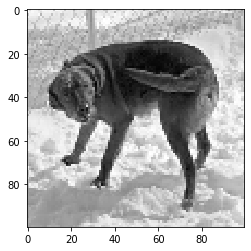

(100, 100)


In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.imshow(new_array2, cmap='gray')
plt.show()
print(new_array.shape)

# Create training and test data

In [5]:
training_data = []
test_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path_train = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats to train
        path_test = TEST_DATADIR  # create path to dogs and cats to test
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path_train)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_train,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num, int(img.split('.')[0])])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    for img in tqdm(os.listdir(path_test)):  # iterate over each image per dogs and cats
        try:
            img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            test_data.append([new_array2, class_num,int(img.split('.')[0])])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass            
           
create_training_data()

print(len(training_data))
print(len(test_data))
print(training_data)


100%|██████████| 25000/25000 [02:00<00:00, 207.85it/s]

200
24946
[[array([[250, 222, 248, ..., 189, 159, 196],
       [248, 241, 248, ..., 168, 174, 189],
       [205, 244, 244, ..., 192, 178, 200],
       ...,
       [171, 171, 159, ..., 196, 204, 212],
       [167, 160, 160, ..., 203, 204, 208],
       [162, 161, 168, ..., 231, 230, 213]], dtype=uint8), 0, 420], [array([[130, 117, 130, ..., 139, 140, 134],
       [125, 133, 133, ..., 148, 145, 129],
       [139, 137, 140, ..., 144, 134, 129],
       ...,
       [119,  99, 117, ..., 117, 135, 120],
       [111, 104, 108, ...,  99, 102, 111],
       [112, 116,  91, ...,  91,  91,  95]], dtype=uint8), 0, 422], [array([[ 89, 111, 110, ..., 142, 143, 137],
       [ 94, 102, 122, ..., 134, 140, 139],
       [ 98,  92, 104, ..., 126, 139, 144],
       ...,
       [ 46,  68,  75, ...,  55,  88,  81],
       [ 66,  34,  79, ...,  43,  78,  79],
       [ 71,  33,  84, ...,  44,  60,  83]], dtype=uint8), 0, 485], [array([[159, 142, 134, ..., 210, 203, 201],
       [130, 131, 133, ..., 201, 198, 199

In [6]:
import random

random.shuffle(training_data)
random.shuffle(test_data)

# Reshape training and test data

In [7]:
X_test = []
X_train = []
y_test = []
y_train = []
z_train = []
z_test = []

for features,label,file_name in training_data:
    X_train.append(features)
    y_train.append(label)
    z_train.append(file_name)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

for features,label,file_name in test_data:
    X_test.append(features)
    y_test.append(label)
    z_test.append(file_name)

#print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[117]
   [119]
   [115]
   ...
   [124]
   [105]
   [123]]

  [[113]
   [121]
   [114]
   ...
   [125]
   [121]
   [121]]

  [[124]
   [113]
   [114]
   ...
   [123]
   [125]
   [124]]

  ...

  [[166]
   [162]
   [158]
   ...
   [157]
   [ 72]
   [ 73]]

  [[161]
   [154]
   [156]
   ...
   [155]
   [149]
   [ 77]]

  [[158]
   [160]
   [165]
   ...
   [146]
   [148]
   [ 87]]]]


In [8]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)

pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)

pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


# Saving data on pickle files

In [9]:
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# Apply data on first training machine

In [10]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

y_test = np_utils.to_categorical(y_test,2)
y_train = np_utils.to_categorical(y_train,2)

X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential()
model2 
model.add(Conv2D(20, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(20))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

print("Calculating prediction")
prediction = model.predict(X_test, batch_size=32)
print(prediction)
print("done")


W0730 19:58:15.106840 139713688626816 deprecation.py:506] From /home/reinaldo/masters/ai/.venv/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 180 samples, validate on 20 samples
Epoch 1/5
180/180 [==============================] - 1s 4ms/sample - loss: 0.8085 - categorical_accuracy: 0.4667 - val_loss: 0.6705 - val_categorical_accuracy: 0.6000
Epoch 2/5
180/180 [==============================] - 1s 4ms/sample - loss: 0.6715 - categorical_accuracy: 0.5889 - val_loss: 0.7082 - val_categorical_accuracy: 0.4000
Epoch 3/5
180/180 [==============================] - 1s 4ms/sample - loss: 0.6397 - categorical_accuracy: 0.5889 - val_loss: 0.6391 - val_categorical_accuracy: 0.7500
Epoch 4/5
180/180 [==============================] - 1s 4ms/sample - loss: 0.5870 - categorical_accuracy: 0.7833 - val_loss: 0.6542 - val_categorical_accuracy: 0.5000
Epoch 5/5
180/180 [==============================] - 1s 4ms/sample - loss: 0.5384 - categorical_accuracy: 0.7556 - val_loss: 0.5713 - val_categorical_accuracy: 0.8500
Calculating prediction
[[0.4871007  0.5128993 ]
 [0.49892756 0.50107247]
 [0.39269754 0.6073024 ]
 ...
 [0.650725   0.34

# sorting the predictions without lose index 

In [11]:
label_pred = np.insert(prediction, 2, z_test , axis =1)

print(label_pred)
print(label_pred.shape)

[[4.8710069e-01 5.1289928e-01 1.1823000e+04]
 [4.9892756e-01 5.0107247e-01 5.5110000e+03]
 [3.9269754e-01 6.0730243e-01 1.0208000e+04]
 ...
 [6.5072501e-01 3.4927502e-01 1.7493000e+04]
 [4.9954942e-01 5.0045055e-01 1.7741000e+04]
 [6.8138254e-01 3.1861746e-01 2.1323000e+04]]
(24946, 3)


In [12]:
#cat_sorte = np.sort(label_pred, axis = 0)[::-1]
cat_sort = label_pred[label_pred[:,0].argsort()]
dog_sort = label_pred[label_pred[:,1].argsort()]
print(cat_sort[::-1])
print(dog_sort[::-1])


[[9.6248108e-01 3.7518945e-02 1.6460000e+03]
 [9.0848011e-01 9.1519877e-02 4.6880000e+03]
 [8.9035136e-01 1.0964869e-01 1.2557000e+04]
 ...
 [4.5099508e-02 9.5490050e-01 2.2662000e+04]
 [4.3906290e-02 9.5609379e-01 1.4827000e+04]
 [3.8046587e-02 9.6195340e-01 1.0636000e+04]]
[[3.8046587e-02 9.6195340e-01 1.0636000e+04]
 [4.3906290e-02 9.5609379e-01 1.4827000e+04]
 [4.5099508e-02 9.5490050e-01 2.2662000e+04]
 ...
 [8.9035136e-01 1.0964869e-01 1.2557000e+04]
 [9.0848011e-01 9.1519877e-02 4.6880000e+03]
 [9.6248108e-01 3.7518945e-02 1.6460000e+03]]


#odenar e escolher 100 melhores de cada categoria mo

# Moving images to paths of training

In [13]:
import shutil as st

ja_treinado ="/home/reinaldo/Documentos/PetImages/ja_treinado" 
for img in os.listdir(TRAIN_DATADIR+"/Cat/"):
    st.move(TRAIN_DATADIR+"/Cat/"+img,ja_treinado+"/Cat/"+img)
for img in os.listdir(TRAIN_DATADIR+"/Dog/"):
    st.move(TRAIN_DATADIR+"/Dog/"+img,ja_treinado+"/Dog/"+img)


# Moving better test images from training

In [14]:
for i in range(100):
    #path of test to training cats
    st.move(TEST_DATADIR+str(int(cat_sort[i][2]))+".jpg",TRAIN_DATADIR+"Cat/"+str(int(cat_sort[i][2]))+".jpg")
    #path of test to training dogs
    st.move(TEST_DATADIR+str(int(dog_sort[i][2]))+".jpg",TRAIN_DATADIR+"Dog/"+str(int(dog_sort[i][2]))+".jpg")

# New training on the loop

In [15]:
ite=0
while os.listdir(TEST_DATADIR) and ite<10:
    ite=ite+1
    training_data = []
    test_data = []
    create_training_data()
    print("tamanho de training data")
    print(len(training_data))
    print("tamanho de test data")
    print(len(test_data))
    random.shuffle(training_data)
    random.shuffle(test_data)

    X_test = []
    X_train = []
    y_test = []
    y_train = []
    z_train = []
    z_test = []

    for features,label,file_name in training_data:
        X_train.append(features)
        y_train.append(label)
        z_train.append(file_name)

    X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    for features,label,file_name in test_data:
        X_test.append(features)
        y_test.append(label)
        z_test.append(file_name)

    X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_test = np_utils.to_categorical(y_test,2)
    y_train = np_utils.to_categorical(y_train,2)

    X_train = X_train/255.0
    X_test = X_test/255.0

    model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
    print("Calculating prediction")
    prediction = model.predict(X_test, batch_size=1)
    print("done")
    pred_index = np.argsort(prediction)

    label_pred = np.insert(prediction, 2, z_test , axis =1)

    print(label_pred)
    print(label_pred.shape)

    cat_sort = label_pred[label_pred[:,0].argsort()]
    dog_sort = label_pred[label_pred[:,1].argsort()]
    

    ja_treinado ="/home/reinaldo/Documentos/PetImages/ja_treinado" 
    for img in os.listdir(TRAIN_DATADIR+"/Cat/"):
        st.move(TRAIN_DATADIR+"/Cat/"+img,ja_treinado+"/Cat/"+img)
    for img in os.listdir(TRAIN_DATADIR+"/Dog/"):
        st.move(TRAIN_DATADIR+"/Dog/"+img,ja_treinado+"/Dog/"+img)
    if len(os.listdir(TEST_DATADIR))>100:
        for i in range(100):
            #path of test to training cats
            try:
                st.move(TEST_DATADIR+str(int(cat_sort[i][2]))+".jpg",TRAIN_DATADIR+"Cat/"+str(int(cat_sort[i][2]))+".jpg")
            #path of test to training dogs
                st.move(TEST_DATADIR+str(int(dog_sort[i][2]))+".jpg",TRAIN_DATADIR+"Dog/"+str(int(dog_sort[i][2]))+".jpg")
            except:
                pass
    else:
        
        for i in range(len(os.listdir(TEST_DATADIR))):
            #path of test to training cats
            try:
                st.move(TEST_DATADIR+str(int(cat_sort[i][2]))+".jpg",TRAIN_DATADIR+"Cat/"+str(int(cat_sort[i][2]))+".jpg")
            #path of test to training dogs
                st.move(TEST_DATADIR+str(int(dog_sort[i][2]))+".jpg",TRAIN_DATADIR+"Dog/"+str(int(dog_sort[i][2]))+".jpg")
            except:
                pass

100%|██████████| 24800/24800 [00:51<00:00, 478.54it/s]


tamanho de training data
200
tamanho de test data
24746
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.1305 - categorical_accuracy: 1.0000 - val_loss: 0.0558 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.0276 - categorical_accuracy: 1.0000 - val_loss: 0.0158 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.0103 - categorical_accuracy: 1.0000 - val_loss: 0.0076 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.0136 - categorical_accuracy: 1.0000 - val_loss: 0.0050 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 5.0477e-04 - categorical_accuracy: 1.0000 - val_loss: 8.4551e-04 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[1.66386217e-01 8.33613813e-01 5.22600000e+03]
 [9.97179627e-01 2.82036699e-03 1.18420000e+04]
 [3.14280748e-01 6.85719252e-01 2.55600000e+03]
 ...
 [1.06666327e-01 8.93333673e-01 1.98890000e+04]
 [9.86875653e-01 1.31243095e-02 6.84600000e+03]
 [2.24038074e-03 9.97759581e-01 1.01140000e+04]]
(24746, 3)


100%|██████████| 24600/24600 [00:21<00:00, 1157.55it/s]


tamanho de training data
200
tamanho de test data
24546
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.6069e-04 - categorical_accuracy: 1.0000 - val_loss: 2.2923e-04 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.6622e-04 - categorical_accuracy: 1.0000 - val_loss: 2.9882e-04 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.3548e-04 - categorical_accuracy: 1.0000 - val_loss: 3.1132e-04 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 5ms/sample - loss: 3.3242e-04 - categorical_accuracy: 1.0000 - val_loss: 2.6687e-04 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 5ms/sample - loss: 2.7197e-04 - categorical_accuracy: 1.0000 - val_loss: 2.1012e-04 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[1.4307802e-04 9.9985695e-01 1.3681000e+04]
 [8.3570182e-02 9.1642982e-01 2.4309000e+04]
 [7.9845567e-04 9.9920160e-01 4.2700000e+02]
 ...
 [1.2301421e-03 9.9876982e-01 7.0180000e+03]
 [1.0213873e-04 9.9989784e-01 2.3517000e+04]
 [7.0724686e-06 9.9999297e-01 9.9840000e+03]]
(24546, 3)


100%|██████████| 24400/24400 [00:21<00:00, 1151.18it/s]


tamanho de training data
200
tamanho de test data
24346
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.6402e-04 - categorical_accuracy: 1.0000 - val_loss: 3.7670e-04 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.6233e-04 - categorical_accuracy: 1.0000 - val_loss: 2.7367e-04 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.9318e-04 - categorical_accuracy: 1.0000 - val_loss: 2.0356e-04 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.4574e-04 - categorical_accuracy: 1.0000 - val_loss: 1.5704e-04 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.1404e-04 - categorical_accuracy: 1.0000 - val_loss: 1.2627e-04 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[4.0661150e-01 5.9338850e-01 1.0535000e+04]
 [7.3692712e-07 9.9999928e-01 7.7000000e+01]
 [6.9179726e-01 3.0820277e-01 1.7348000e+04]
 ...
 [1.0093907e-03 9.9899060e-01 6.3650000e+03]
 [8.3695575e-08 9.9999988e-01 1.0576000e+04]
 [2.6468665e-04 9.9973530e-01 2.1858000e+04]]
(24346, 3)


100%|██████████| 24200/24200 [00:21<00:00, 1124.04it/s]


tamanho de training data
200
tamanho de test data
24146
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.1274e-04 - categorical_accuracy: 1.0000 - val_loss: 2.3189e-04 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.6612e-04 - categorical_accuracy: 1.0000 - val_loss: 1.8094e-04 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.2802e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4221e-04 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 9.9555e-05 - categorical_accuracy: 1.0000 - val_loss: 1.1491e-04 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 7.9596e-05 - categorical_accuracy: 1.0000 - val_loss: 9.5453e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[9.99380112e-01 6.19807572e-04 2.17760000e+04]
 [1.27307634e-04 9.99872684e-01 2.53800000e+03]
 [9.84482944e-01 1.55170895e-02 5.20300000e+03]
 ...
 [1.56188648e-07 9.99999881e-01 1.87860000e+04]
 [4.36467618e-01 5.63532293e-01 1.19950000e+04]
 [9.98822272e-01 1.17765856e-03 7.17200000e+03]]
(24146, 3)


100%|██████████| 24000/24000 [00:20<00:00, 1153.29it/s]


tamanho de training data
200
tamanho de test data
23946
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.5464e-04 - categorical_accuracy: 1.0000 - val_loss: 1.2235e-04 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 1.2239e-04 - categorical_accuracy: 1.0000 - val_loss: 9.6918e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 9.8670e-05 - categorical_accuracy: 1.0000 - val_loss: 7.6901e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 7.9476e-05 - categorical_accuracy: 1.0000 - val_loss: 6.2247e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 6.5017e-05 - categorical_accuracy: 1.0000 - val_loss: 5.1493e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[8.0063105e-01 1.9936897e-01 2.4743000e+04]
 [2.2828718e-01 7.7171284e-01 8.6470000e+03]
 [5.0319766e-05 9.9994969e-01 1.1000000e+01]
 ...
 [9.7445393e-01 2.5546091e-02 1.8199000e+04]
 [1.7616384e-02 9.8238361e-01 1.5002000e+04]
 [3.3500187e-02 9.6649987e-01 1.1000000e+02]]
(23946, 3)


100%|██████████| 23800/23800 [00:20<00:00, 1159.83it/s]


tamanho de training data
200
tamanho de test data
23746
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 8.3499e-05 - categorical_accuracy: 1.0000 - val_loss: 8.8263e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 6.8761e-05 - categorical_accuracy: 1.0000 - val_loss: 7.3883e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 5.6900e-05 - categorical_accuracy: 1.0000 - val_loss: 6.2315e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 4.7921e-05 - categorical_accuracy: 1.0000 - val_loss: 5.3286e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 4.1103e-05 - categorical_accuracy: 1.0000 - val_loss: 4.6281e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[2.4582753e-06 9.9999750e-01 1.5533000e+04]
 [3.8925875e-05 9.9996102e-01 1.1126000e+04]
 [2.5994936e-05 9.9997401e-01 1.3896000e+04]
 ...
 [9.4663072e-03 9.9053371e-01 3.9740000e+03]
 [5.2315658e-01 4.7684336e-01 8.3410000e+03]
 [7.9918891e-01 2.0081110e-01 5.7300000e+02]]
(23746, 3)


100%|██████████| 23600/23600 [00:20<00:00, 1150.13it/s]


tamanho de training data
200
tamanho de test data
23546
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 6.3165e-05 - categorical_accuracy: 1.0000 - val_loss: 5.3039e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 5.4569e-05 - categorical_accuracy: 1.0000 - val_loss: 4.6261e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 4.7273e-05 - categorical_accuracy: 1.0000 - val_loss: 4.0400e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 4.1051e-05 - categorical_accuracy: 1.0000 - val_loss: 3.5457e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.5991e-05 - categorical_accuracy: 1.0000 - val_loss: 3.1432e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[5.0492173e-01 4.9507821e-01 1.4036000e+04]
 [8.6543255e-02 9.1345680e-01 9.2770000e+03]
 [7.2382557e-01 2.7617440e-01 1.8973000e+04]
 ...
 [1.5982090e-02 9.8401791e-01 1.1620000e+04]
 [9.9561948e-01 4.3805563e-03 2.1890000e+04]
 [3.8744847e-06 9.9999607e-01 1.3580000e+04]]
(23546, 3)


100%|██████████| 23400/23400 [00:20<00:00, 1165.37it/s]


tamanho de training data
200
tamanho de test data
23346
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 4.4967e-05 - categorical_accuracy: 1.0000 - val_loss: 3.8616e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.9588e-05 - categorical_accuracy: 1.0000 - val_loss: 3.4162e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.4875e-05 - categorical_accuracy: 1.0000 - val_loss: 3.0407e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.0932e-05 - categorical_accuracy: 1.0000 - val_loss: 2.7286e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.7603e-05 - categorical_accuracy: 1.0000 - val_loss: 2.4680e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[2.4867889e-02 9.7513211e-01 2.1510000e+03]
 [9.6598643e-01 3.4013528e-02 1.1976000e+04]
 [1.5911350e-03 9.9840885e-01 1.5367000e+04]
 ...
 [4.9140327e-02 9.5085973e-01 6.8380000e+03]
 [1.9817022e-04 9.9980181e-01 9.5300000e+02]
 [8.6217308e-01 1.3782692e-01 1.0939000e+04]]
(23346, 3)


100%|██████████| 23200/23200 [00:19<00:00, 1163.07it/s]


tamanho de training data
200
tamanho de test data
23146
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.4653e-05 - categorical_accuracy: 1.0000 - val_loss: 3.8259e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.1280e-05 - categorical_accuracy: 1.0000 - val_loss: 3.4711e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.8248e-05 - categorical_accuracy: 1.0000 - val_loss: 3.1607e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.5699e-05 - categorical_accuracy: 1.0000 - val_loss: 2.8917e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.3496e-05 - categorical_accuracy: 1.0000 - val_loss: 2.6591e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[9.9932981e-01 6.7022885e-04 2.2280000e+03]
 [4.6771247e-02 9.5322871e-01 1.0486000e+04]
 [5.2777010e-01 4.7222987e-01 1.0330000e+03]
 ...
 [9.4207609e-01 5.7923973e-02 2.8690000e+03]
 [9.9737918e-01 2.6208777e-03 1.6177000e+04]
 [9.9990308e-01 9.6869386e-05 1.0761000e+04]]
(23146, 3)


100%|██████████| 23000/23000 [00:21<00:00, 1069.78it/s]


tamanho de training data
200
tamanho de test data
22946
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 3.1608e-05 - categorical_accuracy: 1.0000 - val_loss: 2.8385e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.8684e-05 - categorical_accuracy: 1.0000 - val_loss: 2.5933e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.6057e-05 - categorical_accuracy: 1.0000 - val_loss: 2.3718e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.3546e-05 - categorical_accuracy: 1.0000 - val_loss: 2.1783e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 2.1508e-05 - categorical_accuracy: 1.0000 - val_loss: 2.0106e-05 - val_categorical_accuracy: 1.0000
Calculating prediction
d

In [16]:
print("Your network is working properly")

Your network is working properly


In [17]:
a = [1, 9, 0, 8, 10]
max(a)

10